# 0.0 Imports

In [27]:
import pandas as pd
import numpy  as np
import os

from sklearn    import metrics as mt
from matplotlib import pyplot  as plt
from sklearn.cluster import KMeans

# 1.0 Load Dataset

In [3]:
x = pd.read_csv('../datasets/clusterizacao/X_dataset.csv')

# 2.0 K-Means

### Parameter
* N_clusters

## 2.1 Elbow Method

In [4]:
values = np.arange(2, 11, 1)
ss_list = []

In [5]:
for i in values:
    #model definition
    Km = KMeans(n_clusters = i, 
                init = 'random',
                n_init = 10, 
                random_state = 0)

    #treino e predict
    labels = Km.fit_predict(x)

    # performance
    ss = np.round(mt.silhouette_score(x,labels), 3)

    # guardando resultado 
    ss_list.append(ss)

    print(f'N_cluster: {i} - Silhouette_score: {ss}')

N_cluster: 2 - Silhouette_score: 0.213
N_cluster: 3 - Silhouette_score: 0.233
N_cluster: 4 - Silhouette_score: 0.218
N_cluster: 5 - Silhouette_score: 0.187
N_cluster: 6 - Silhouette_score: 0.198
N_cluster: 7 - Silhouette_score: 0.217
N_cluster: 8 - Silhouette_score: 0.183
N_cluster: 9 - Silhouette_score: 0.186
N_cluster: 10 - Silhouette_score: 0.183


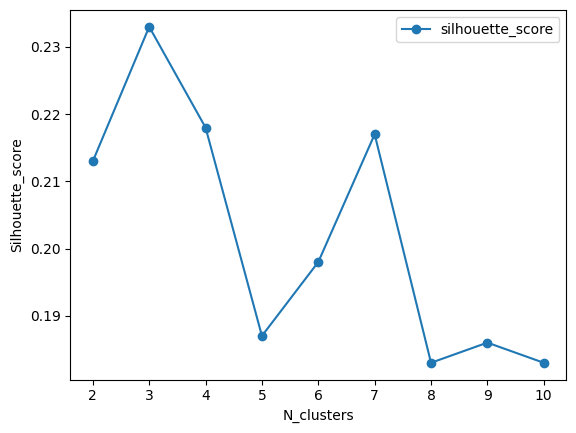

In [6]:
#visualização da metrica
plt.plot(values, ss_list, marker = 'o', label = 'silhouette_score')
plt.xlabel('N_clusters')
plt.ylabel('Silhouette_score')
plt.legend()

In [7]:
best_c = values[np.argmax(ss_list)]
best_c

3

## 2.2 Final Model

In [8]:
Km = KMeans(n_clusters = best_c, 
                init = 'random',
                n_init = 10, 
                random_state = 0)

#predict
labels = Km.fit_predict(x)

# performance
ss_score = np.round(mt.silhouette_score(x,labels), 3)
print(f'Silhouette Score: {ss_score}')

Silhouette Score: 0.233


# 3.0 Save Results

In [34]:
metrics = {
    'Algoritmo'   : 'K-Means',
    'N_cluesters' : best_c,
    'Average Silhouette Score': ss_score,
}
df = pd.DataFrame([metrics])

df.to_csv(
    './metrics_clusterizacao.csv',
    mode='a',
    index=False,
    header=not os.path.exists('./metrics_clusterizacao.csv')
)